<a href="https://colab.research.google.com/github/aryan-at-ul/group_project_waves_predictions/blob/main/fb_prophet_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
# !pip install fbprophet
# !pip install plotly

In [176]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [177]:
path = "/content/drive/MyDrive/imputed_new/M5.csv"
forc = "waveperiod"
df = pd.read_csv(path,parse_dates=["date"],index_col=["date"])
df.drop(df.columns.difference([forc]),1,inplace= True)
df.head()

waveperiod
date                  
2004-10-18    4.307692
2004-10-19    5.043478
2004-10-20    5.095238
2004-10-21    7.166667
2004-10-22    7.750000

In [178]:
from sklearn.preprocessing import LabelEncoder

In [179]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(df.index)
train_dataset['y']=df[forc].values
train_dataset.tail(2)

ds         y
6170 2021-09-09  4.155292
6171 2021-09-10  4.441500

In [180]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [181]:
future= prophet_basic.make_future_dataframe(periods=90)
future.tail(2)

ds
6260 2021-12-08
6261 2021-12-09

In [182]:
forecast=prophet_basic.predict(future)

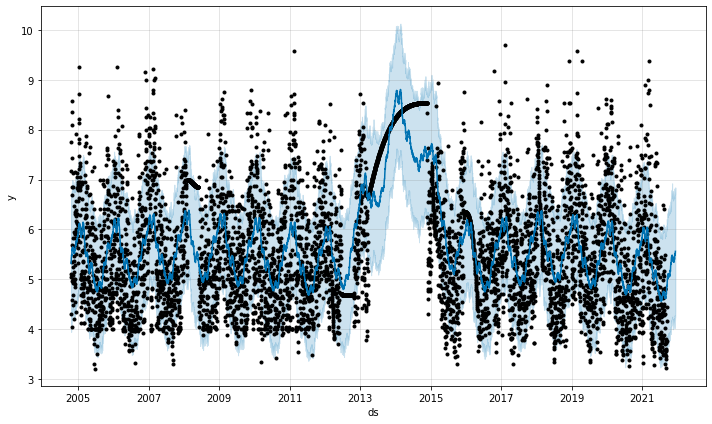

In [183]:
fig1 =prophet_basic.plot(forecast)

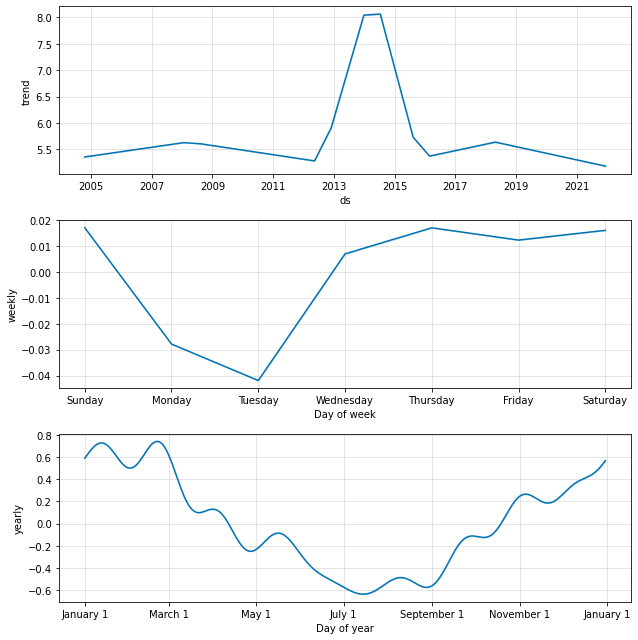

In [184]:
fig1 = prophet_basic.plot_components(forecast)

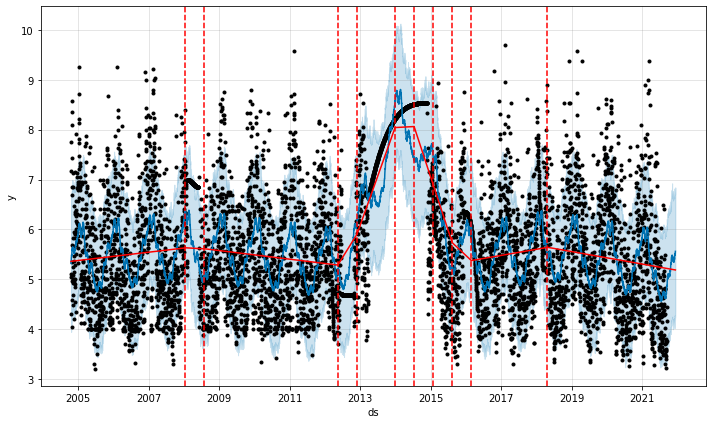

In [185]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


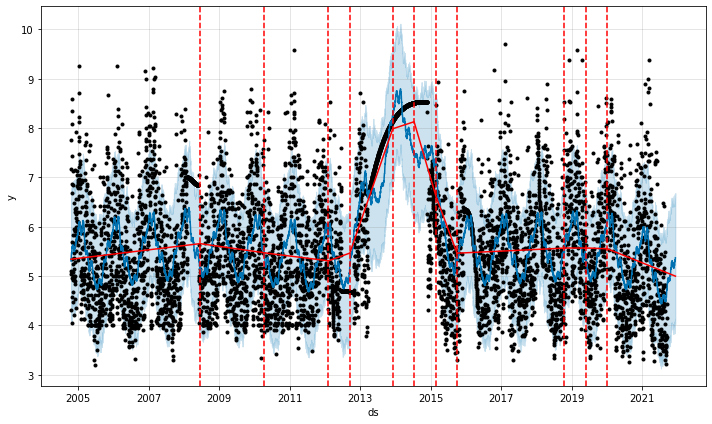

In [186]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


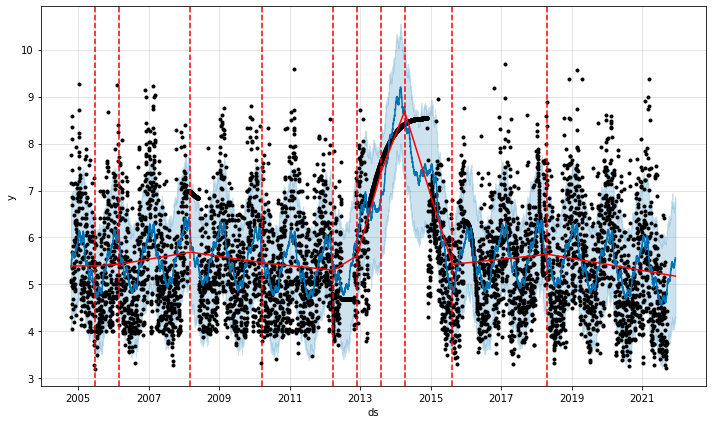

In [187]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [188]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

train and test split

In [189]:
train=train_dataset[:int(len(train_dataset.index) * .80)]
test=train_dataset[int(len(train_dataset.index) * .80):]

In [190]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(train)
future=m.make_future_dataframe(periods=12,freq='MS')
forecast=m.predict(future)
forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds     trend  ...  additive_terms_upper      yhat
4944 2018-12-01  5.757916  ...                   0.0  5.929296
4945 2019-01-01  5.767075  ...                   0.0  6.303863
4946 2019-02-01  5.776235  ...                   0.0  6.140257
4947 2019-03-01  5.784509  ...                   0.0  6.170448
4948 2019-04-01  5.793669  ...                   0.0  5.973416

[5 rows x 19 columns]

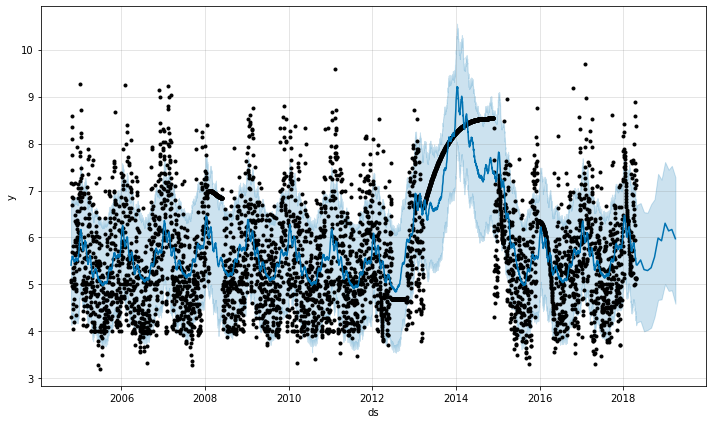

In [191]:
m.plot(forecast, uncertainty=True)
plt.show()

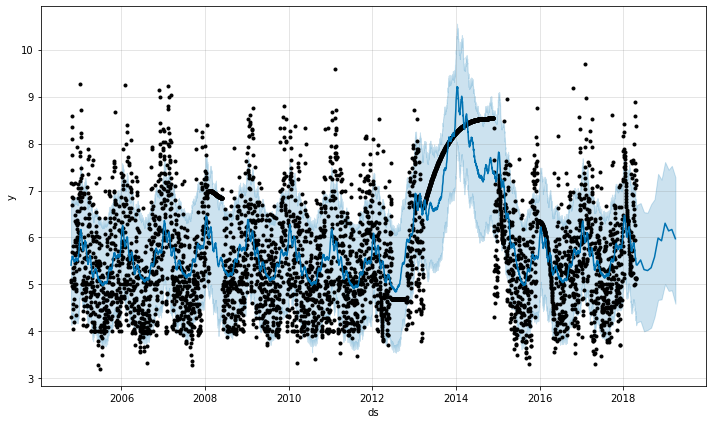

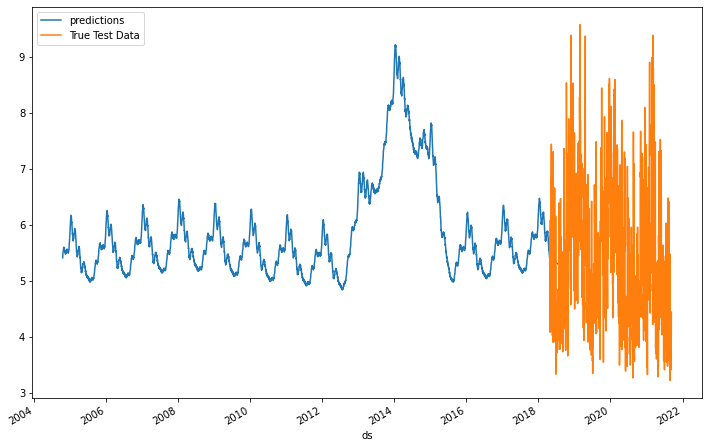

In [192]:
m.plot(forecast)
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax)

In [ ]:
# Initial training period.
initial= 2*365
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period= 2*365
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 1
horizon=str(horizon)+' days'
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon)
# Performance Metrics of fb_cv
performance_metrics(fb_cv)

INFO:fbprophet:Making 6 forecasts with cutoffs between 2008-04-25 00:00:00 and 2018-04-23 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]